In [1]:
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import image

from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix , plot_confusion_matrix

import  PIL
print('Pillow version is :', PIL.__version__)
from PIL import Image
from numpy import asarray

import copy

Pillow version is : 7.0.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
from google.colab.patches import cv2_imshow

In [4]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
from tensorflow import keras
from tensorflow.keras import layers as layers

In [7]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, BatchNormalization

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers

In [9]:
plant_data_labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')
plant_data_labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [10]:
plant_data_labels.isnull().sum()

Label    0
dtype: int64

In [11]:
plant_data_labels.iloc[10,0]

'Small-flowered Cranesbill'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


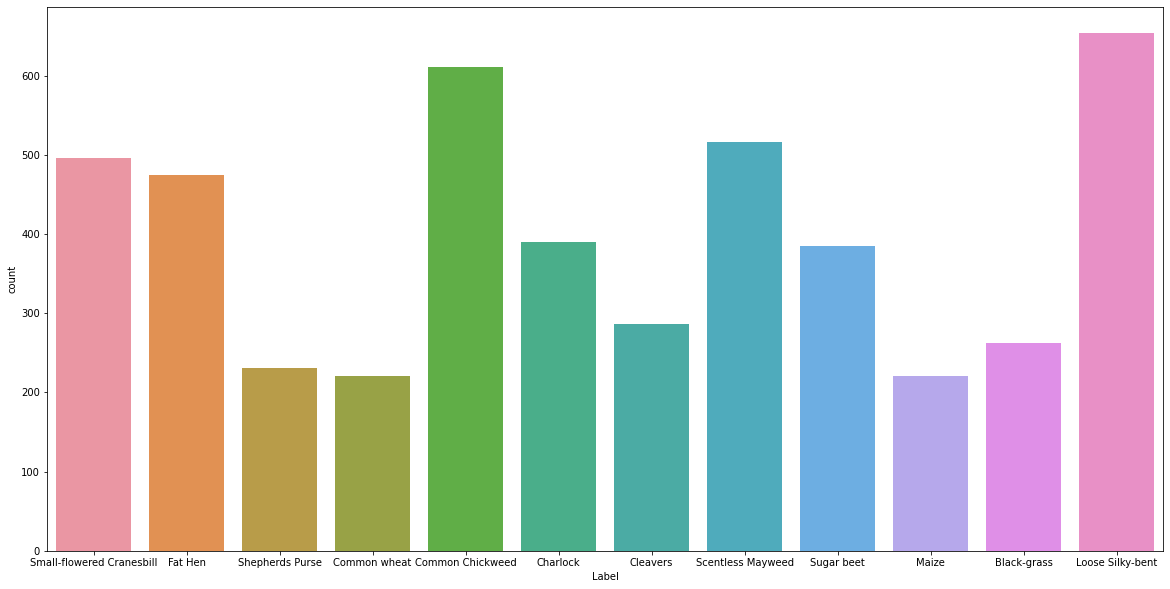

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(plant_data_labels['Label'])

In [13]:
plant_data_images = np.load('/content/drive/My Drive/Colab Notebooks/images.npy')
#plant_data_images

In [14]:
plant_data_images.shape

(4750, 128, 128, 3)

In [15]:
plant_data_images[1].shape

(128, 128, 3)

<class 'PIL.Image.Image'>


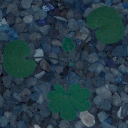

In [16]:
### Create image from numpy array data
plant_image1 = Image.fromarray(plant_data_images[1])
print(type(plant_image1))


plant_image1

Plant is :  Small-flowered Cranesbill


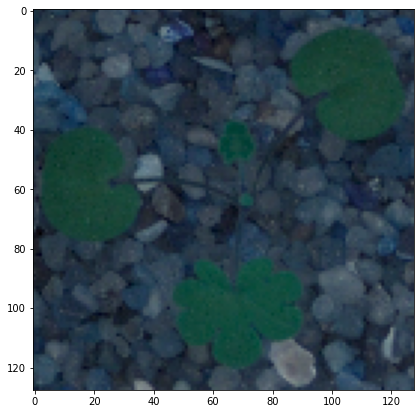

In [17]:
### Using matplotlib to dispplay image from array
plt.figure(figsize=(7,7))
print('Plant is : ', plant_data_labels.iloc[1,0] )
plant_image1A = plt.imshow(plant_data_images[1])

Plant is :  Fat Hen


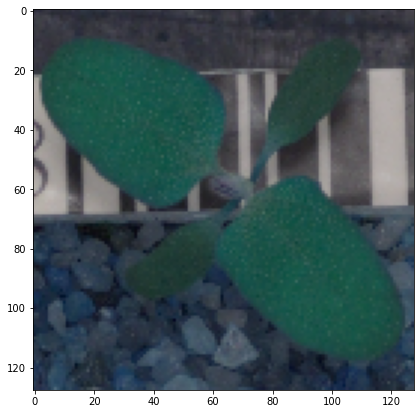

In [18]:
### Using matplotlib to dispplay image from array
plt.figure(figsize=(7,7))
print('Plant is : ', plant_data_labels.iloc[500,0] )
plant_image1B = plt.imshow(plant_data_images[500])

## 2  Pre-processing

### 2.a Normalizing pixel images to between 0 and 1 by dividing by 255

In [19]:
plant_data_images_normal = plant_data_images.astype('float32') / 255.0
#plant_data_images_normal

### 2.b Applying Gaussian blurring after normalizing

In [20]:
print(plant_data_images_normal.shape)

(4750, 128, 128, 3)


In [21]:
# Creating a empty numpy array to store the new values after applying Gaussian blurring

plant_data_gblur = plant_data_images_normal.copy()
#print(plant_data_gblur)
print(plant_data_gblur.shape)

(4750, 128, 128, 3)


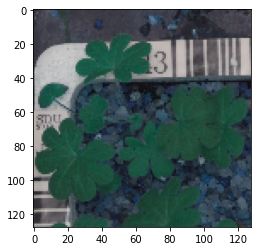

In [22]:
plt.imshow(plant_data_gblur[3])

In [23]:
# APpplying Gaussian blur to each image pixel set . Size 5 x 5
for idx, img in enumerate(plant_data_gblur):
   plant_data_gblur[idx] = cv2.GaussianBlur(img, (5,5), 0) 

### 2.c Visualize data after pre-processing

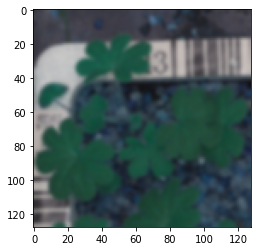

In [24]:
# view image 
plt.imshow(plant_data_gblur[3])

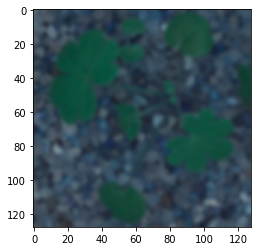

In [25]:
# view image 
plt.imshow(plant_data_gblur[111])

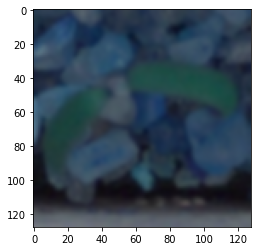

In [26]:
# view image 
plt.imshow(plant_data_gblur[600])

Testing with Kernel filetr of size 10

In [27]:
# Creating a empty numpy array to store the new values after applying Gaussian blurring

plant_data_gblur1 = plant_data_images_normal.copy()
#print(plant_data_gblur1)
print(plant_data_gblur1.shape)

(4750, 128, 128, 3)


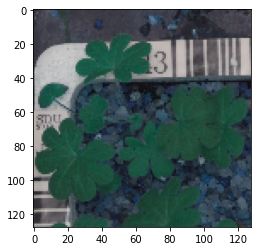

In [28]:
plt.imshow(plant_data_gblur1[3])

In [29]:
# APpplying Gaussian blur to each image pixel set
for idx, img in enumerate(plant_data_gblur1):
   plant_data_gblur1[idx] = cv2.GaussianBlur(img, (9,9), 0) 

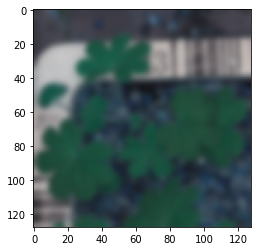

In [30]:
# view image 
plt.imshow(plant_data_gblur1[3])

## 3 : Data compatibility secton

### 3.a Converting Labels into one-hot-encoding

In [31]:
y = copy.deepcopy(plant_data_labels)
y

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [32]:
y.shape

(4750, 1)

In [33]:
X = copy.deepcopy(plant_data_gblur) # will use the Gaussian Blurred images set with Filter 5 x 5 
#X

In [34]:
X.shape

(4750, 128, 128, 3)

In [35]:
print(y.value_counts())
print('\nNumber of labels is : ', y.value_counts().count())

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

Number of labels is :  12


In [36]:
y_class = pd.get_dummies(y)
y_class.shape

(4750, 12)

In [37]:
y_class

,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,0,0,1,0,0,0,0,0
4746,0,0,0,0,0,0,1,0,0,0,0,0
4747,0,0,0,0,0,0,1,0,0,0,0,0
4748,0,0,0,0,0,0,1,0,0,0,0,0


### 3.c Split into Train , Valid and Test data sets

In [38]:
X_train, X_test1, y_train,  y_test1 = train_test_split(X, y_class, test_size = 0.3, random_state = 3, shuffle = True)

In [39]:
X_valid, X_test, y_valid,  y_test = train_test_split(X_test1, y_test1, test_size = 0.5, random_state = 3, shuffle = True)

### 3.d Check shape of data

In [40]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)
(3325, 12)
(712, 12)
(713, 12)


In [41]:
#X_train[10]

In [42]:
X_train[10].shape

(128, 128, 3)

In [43]:
#X_valid[10]

In [44]:
X_valid[10].shape

(128, 128, 3)

In [45]:
y_train.shape

(3325, 12)

In [46]:
y_train

,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
1491,0,0,0,1,0,0,0,0,0,0,0,0
2698,0,0,1,0,0,0,0,0,0,0,0,0
1088,0,0,0,0,0,0,0,0,0,1,0,0
4490,0,0,0,0,0,0,1,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
789,0,0,0,0,0,1,0,0,0,0,0,0
968,0,0,0,0,0,1,0,0,0,0,0,0
1667,0,0,0,1,0,0,0,0,0,0,0,0
3321,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
y_train.iloc[10]

Label_Black-grass                  0
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             1
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 4697, dtype: uint8

In [48]:
y_train.iloc[3]

Label_Black-grass                  0
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             1
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 4490, dtype: uint8

### 3.b Print label for y_train[0]

In [49]:
y_train.iloc[0]

Label_Black-grass                  0
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             1
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 1491, dtype: uint8

In [50]:
y_test

,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
2694,0,0,1,0,0,0,0,0,0,0,0,0
4007,1,0,0,0,0,0,0,0,0,0,0,0
2665,0,0,1,0,0,0,0,0,0,0,0,0
2172,0,1,0,0,0,0,0,0,0,0,0,0
3983,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2908,0,0,0,0,0,0,0,0,1,0,0,0
4320,0,0,0,0,0,0,1,0,0,0,0,0
1090,0,0,0,0,0,0,0,0,0,1,0,0
3401,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
check_2 = pd.Series.to_frame(y_test.iloc[2])

In [52]:
check_2.iloc[np.argmax(y_test.iloc[2])]

2665    1
Name: Label_Cleavers, dtype: uint8

In [53]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)
(3325, 12)
(712, 12)
(713, 12)


### 3.d Note regarding shape of data : The shapes have the color attribute value of 3 , for all images in X_train , X_valid and X_test. Hence , shapes are compatible with Keras models

## 4 Building CNN

### 4.a Defining layers , Model3 with Padding,  Dropoff , Maxpooling and GlobalMaxPooling

In [54]:
model3 = keras.Sequential()
model3.add(Conv2D(filters=64, kernel_size=3, padding='same', activation="relu", input_shape=(128, 128, 3)))
model3.add(layers.MaxPooling2D(2,2))
model3.add(layers.BatchNormalization())

model3.add(Conv2D(filters=64, kernel_size=3, padding='same', activation="relu")) 
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.BatchNormalization())
# Add a MaxPooling Layer of size 2X2 

model3.add(Conv2D(filters=64, kernel_size=3, padding='same', activation="relu")) 
model3.add(MaxPooling2D(pool_size=(2, 2))) # ANother Pooling layer added
model3.add(layers.BatchNormalization())

model3.add(Conv2D(filters=64, kernel_size=3, padding='same', activation="relu")) 
model3.add(MaxPooling2D(pool_size=(2, 2))) # ANother Pooling layer added
model3.add(layers.BatchNormalization())

model3.add(Conv2D(filters=64, kernel_size=3, padding='same', activation="relu")) 
model3.add(MaxPooling2D(pool_size=(2, 2))) # ANother Pooling layer added
model3.add(layers.BatchNormalization())

# Apply Dropout with 0.5 
model3.add(Dropout(rate=0.5))

model3.add(layers.GlobalMaxPooling2D())
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation="relu")) # three dense layers
model3.add(Dropout(rate=0.5))

#model3.add(layers.Dense(64, layers.LeakyReLU(alpha=0.2))) # adding a layer with LeakyReLU activation.LeakyReLU is to be added as a layer.
model3.add(layers.Dense(128, activation="relu"))
model3.add(Dropout(rate=0.5))

model3.add(layers.Dense(64, activation="relu"))
# model3.add(Dropout(rate=0.5))

model3.add(layers.Dense(32, activation="relu"))

model3.add(layers.Dense(12, activation="softmax")) # twelve neurons in output layer, one for each class
model3.output_shape

(None, 12)

In [55]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        3

In [56]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=30, verbose=1, restore_best_weights=True)

In [57]:
model_checkpoint =  ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/PCP_05Nov20A1/plat_classificationr_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only= True, 
                                                           mode='auto',
                                                           save_freq='epoch')

### 4.b Set optimizers and loss function - Has been completed in next section 5.a

## 5 Fit , Evaluate model and print confusion matrix

### 5.a Compiling and fitting the Third model

Epoch 1/280
104/104 [==============================] - ETA: 0s - loss: 2.6473 - accuracy: 0.1041
Epoch 00001: val_loss improved from inf to 2.48585, saving model to /content/drive/My Drive/Colab Notebooks/PCP_05Nov20A1/plat_classificationr_cnn_checkpoint_01_loss2.4858.h5
104/104 [==============================] - 3s 33ms/step - loss: 2.6473 - accuracy: 0.1041 - val_loss: 2.4858 - val_accuracy: 0.1404
Epoch 2/280
102/104 [============================>.] - ETA: 0s - loss: 2.4676 - accuracy: 0.1523
Epoch 00002: val_loss improved from 2.48585 to 2.47709, saving model to /content/drive/My Drive/Colab Notebooks/PCP_05Nov20A1/plat_classificationr_cnn_checkpoint_02_loss2.4771.h5
104/104 [==============================] - 3s 28ms/step - loss: 2.4674 - accuracy: 0.1513 - val_loss: 2.4771 - val_accuracy: 0.1404
Epoch 3/280
103/104 [============================>.] - ETA: 0s - loss: 2.3408 - accuracy: 0.2008
Epoch 00003: val_loss improved from 2.47709 to 2.47323, saving model to /content/drive/My D

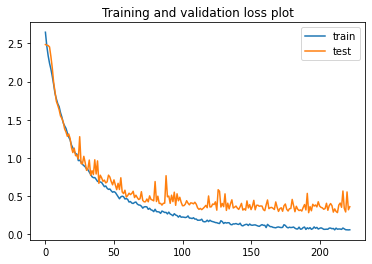

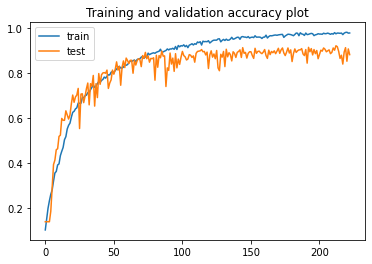

In [58]:
# Compile the model
adam_opt = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer= adam_opt)

# Fit the model
history = model3.fit( x=X_train, y=y_train, batch_size=32, epochs=280, validation_data = (X_valid, y_valid), verbose=1, callbacks=[model_checkpoint,early_stopping] )

plt.title('Training and validation loss plot')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# print(history.history.keys())
plt.title('')
plt.title('Training and validation accuracy plot')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### 5.b Evaluate model3 using Test data

In [59]:
model3.evaluate(X_test, y_test, verbose=1)

23/23 [==============================] - 0s 12ms/step - loss: 0.2922 - accuracy: 0.9102


[0.2922234833240509, 0.9102384448051453]

### 5.c Confusion Matrix

In [60]:
y_pred3 = model3.predict(X_test)

In [61]:
y_pred3

array([[1.51011263e-04, 6.48072585e-02, 9.17295158e-01, ...,
        9.02357046e-04, 1.25501035e-02, 3.06927941e-05],
       [9.90949333e-01, 3.64030051e-09, 8.95224548e-06, ...,
        5.63091553e-11, 3.58187805e-07, 1.88475155e-06],
       [8.11212303e-05, 2.98533938e-03, 9.91015375e-01, ...,
        4.88056503e-05, 1.78440334e-03, 3.65723281e-05],
       ...,
       [5.87247591e-03, 1.96315274e-02, 7.79145537e-03, ...,
        1.99707508e-01, 2.18865260e-01, 2.40163431e-02],
       [1.28665968e-04, 7.40850510e-07, 4.40281565e-06, ...,
        1.22608384e-07, 4.24368727e-06, 9.97894704e-01],
       [9.22405541e-01, 1.01970898e-09, 3.77829269e-06, ...,
        5.20260120e-11, 5.38652955e-07, 2.87872172e-06]], dtype=float32)

In [62]:
np.argmax(y_pred3, axis=1)

array([ 2,  0,  2,  1,  0,  1,  4,  2,  7,  6,  6,  4,  3,  3,  6, 11,  0,
       10,  0,  9,  9,  5,  6, 10,  9, 10,  5,  5,  4,  4,  2,  6,  0,  7,
       10,  7,  6, 11,  8,  3,  3,  0, 11,  5, 11,  3,  1,  9,  6, 10, 11,
        5,  1,  3, 11,  1, 10, 10,  2, 11, 11,  9,  5, 10,  1,  0,  5, 10,
        8,  3,  2,  5,  5,  9,  2,  8,  8,  1, 10, 11,  6,  5,  6, 11, 10,
        7,  8,  1,  4,  2, 10,  2,  0,  4,  3,  0,  0,  3,  6, 11, 10,  2,
        8, 10,  0,  5,  7,  7,  6,  9,  4, 11,  1, 11,  1,  6, 10,  7, 10,
        2,  3,  8, 10,  0, 10, 11,  2,  5,  3,  1, 10,  5,  0,  3,  6,  8,
        3, 10,  5,  5,  3,  8,  5,  3,  7,  3, 10,  6,  6,  1,  2,  5, 10,
       10,  3,  8,  5, 10,  5,  6,  3,  5,  3,  0,  9,  4,  6,  2,  6, 11,
        3,  2, 11,  3,  6,  3,  8,  4,  1,  3,  4,  3,  6,  8,  2,  3,  5,
        2,  8,  3,  2, 10,  2, 10,  2,  8,  1,  8,  6,  3, 10,  9, 10, 11,
       11,  0, 10,  5, 10,  6,  1,  9,  5,  3,  5,  8, 11,  6, 11,  6,  3,
       11,  0,  5,  8,  8

In [63]:
y_pred_class3 = np.argmax(y_pred3, axis=1)
# y_pred_encoded3 = pd.get_dummies(y_pred_class3)
# y_pred_encoded3

In [64]:
y_test

,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
2694,0,0,1,0,0,0,0,0,0,0,0,0
4007,1,0,0,0,0,0,0,0,0,0,0,0
2665,0,0,1,0,0,0,0,0,0,0,0,0
2172,0,1,0,0,0,0,0,0,0,0,0,0
3983,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2908,0,0,0,0,0,0,0,0,1,0,0,0
4320,0,0,0,0,0,0,1,0,0,0,0,0
1090,0,0,0,0,0,0,0,0,0,1,0,0
3401,0,0,0,0,0,0,0,0,0,0,0,1


In [65]:
y_test_array = y_test.to_numpy()
y_test_array

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [66]:
y_test_class = np.argmax(y_test_array, axis=1)
y_test_class

array([ 2,  0,  2,  1,  0,  1,  4,  2,  7,  6,  6,  4,  3,  3,  0, 11,  0,
       10,  0,  9,  9,  5,  6, 10,  9, 10,  5,  5,  8,  0,  2,  6,  0,  7,
       10,  7,  0, 11,  9,  8,  3,  0, 11,  5, 11,  3,  1,  9,  6, 10, 11,
        5,  1,  3, 11,  1, 10, 10,  2, 11,  7,  9,  5, 10,  1,  0,  5, 10,
        8,  3,  2,  5,  5,  9,  2,  8,  8,  1, 10, 11,  6,  1, 10, 11, 10,
        7,  8,  1,  4,  2, 10,  2,  0,  4,  9,  0,  0,  3,  6, 11, 10,  2,
        8, 10,  6,  5,  7,  7,  6,  9,  4, 11,  1, 11,  1,  6, 10,  7, 10,
        2,  3,  8, 10,  0, 10, 11,  2,  5,  3,  1, 10,  5,  0, 10,  0,  8,
        3, 10,  5,  5,  3,  8,  5,  3,  7,  3, 10,  6,  6,  1,  2,  5, 10,
       10,  3,  8,  5,  2,  5,  8,  3,  5,  3,  6,  9,  4,  6,  2,  6, 11,
        3,  2, 11,  3,  6,  3,  8,  4,  1,  3,  4,  9,  6,  8,  2,  3,  5,
        2,  8,  3,  2, 10,  2, 10,  2,  8,  1,  8,  6,  3, 10,  9, 10, 11,
        7,  0, 10,  5, 10,  6,  1,  9,  5,  3,  5,  8, 11,  6, 11,  6,  3,
       11,  0,  5,  8,  8

**Confusion Matrix**

In [67]:
print(" Confusion Matrix for the 12 classes")
cm3 = confusion_matrix(y_test_class, y_pred_class3)
print(cm3)

 Confusion Matrix for the 12 classes
[[30  0  0  0  1  1 10  0  0  0  0  1]
 [ 0 49  1  1  0  1  0  1  0  1  0  0]
 [ 0  0 40  0  1  1  0  0  0  0  1  0]
 [ 0  0  0 74  0  0  0  0  0  1  0  0]
 [ 0  0  0  0 21  3  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  1  0]
 [ 9  0  0  1  0  0 91  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0  0  3]
 [ 0  1  0  1  1  0  1  0 72  3  0  0]
 [ 0  0  0  6  0  0  0  1  7 29  0  0]
 [ 0  0  1  1  0  0  1  0  0  0 79  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 69]]


In [68]:
len(cm3)

12

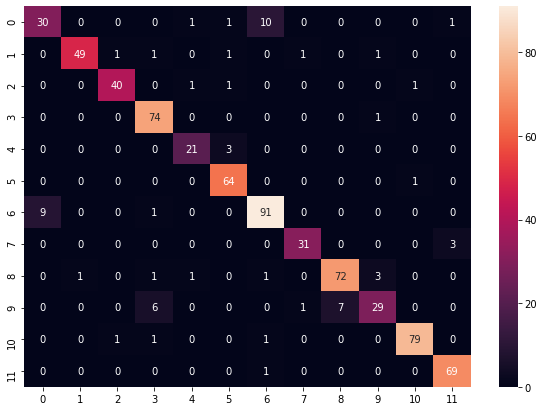

In [69]:

df_cm3 = pd.DataFrame(cm3, index = np.unique(y_test_class),
                     columns = np.unique(y_test_class))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm3, annot=True, fmt='d')

## 6.a Check predictions for various test cases

In [70]:
y_test.iloc[2]

Label_Black-grass                  0
Label_Charlock                     0
Label_Cleavers                     1
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 2665, dtype: uint8

Plant is :  2665    1
Name: Label_Cleavers, dtype: uint8
Predited label is : 2
Actual label is : 2


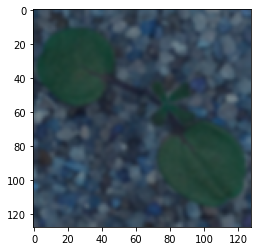

In [71]:
img = X_test[2]
check_2 = pd.Series.to_frame(y_test.iloc[2])

print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[2])] )
plt.imshow(img)
print("Predited label is :", y_pred_class3[2])
print("Actual label is :", y_test_class[2])

In [72]:
y_test.iloc[3]

Label_Black-grass                  0
Label_Charlock                     1
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 2172, dtype: uint8

Plant is :  2172    1
Name: Label_Charlock, dtype: uint8
Predited label is : 1
Actual label is : 1


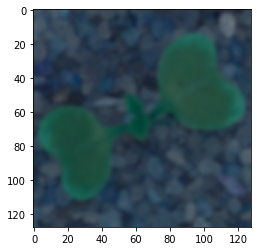

In [73]:
img1 = X_test[3]
check_2 = pd.Series.to_frame(y_test.iloc[3])

print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[3])] )
plt.imshow(img1)
print("Predited label is :", y_pred_class3[3])
print("Actual label is :", y_test_class[3])

In [74]:
y_test.iloc[33]

Label_Black-grass                  0
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        1
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 3654, dtype: uint8

Plant is :  3654    1
Name: Label_Maize, dtype: uint8
Predited label is : 7
Actual label is : 7


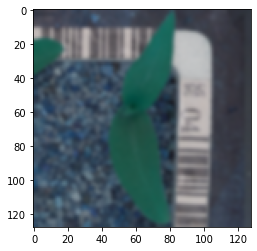

In [75]:
img2 = X_test[33]

check_2 = pd.Series.to_frame(y_test.iloc[33])
print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[33])] )
plt.imshow(img2)
print("Predited label is :", y_pred_class3[33])
print("Actual label is :", y_test_class[33])

In [76]:
y_test.iloc[36]

Label_Black-grass                  1
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 3919, dtype: uint8

Plant is :  3919    1
Name: Label_Black-grass, dtype: uint8
Predited label is : 6
Actual label is : 0


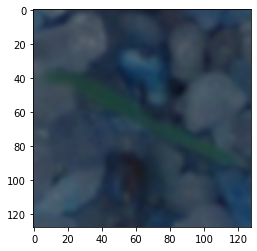

In [77]:
img3 = X_test[36]
check_2 = pd.Series.to_frame(y_test.iloc[36])

print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[36])] )
plt.imshow(img3)
print("Predited label is :", y_pred_class3[36])
print("Actual label is :", y_test_class[36])

In [78]:
y_test.iloc[59]

Label_Black-grass                  0
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   1
Name: 3478, dtype: uint8

Plant is :  3478    1
Name: Label_Sugar beet, dtype: uint8
Predited label is : 11
Actual label is : 11


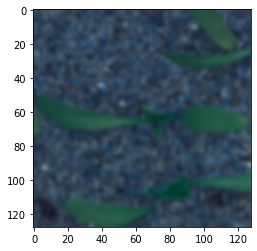

In [79]:
img4 = X_test[59]
check_2 = pd.Series.to_frame(y_test.iloc[59])

print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[59])] )
plt.imshow(img4)
print("Predited label is :", y_pred_class3[59])
print("Actual label is :", y_test_class[59])

In [80]:
y_test.iloc[77]

Label_Black-grass                  0
Label_Charlock                     1
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 2193, dtype: uint8

Plant is :  2193    1
Name: Label_Charlock, dtype: uint8
Predited label is : 1
Actual label is : 1


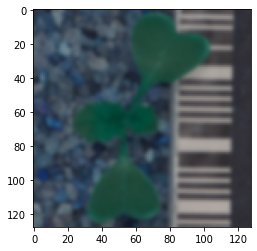

In [81]:
img5 = X_test[77]
check_2 = pd.Series.to_frame(y_test.iloc[77])

print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[77])] )
plt.imshow(img5)
print("Predited label is :", y_pred_class3[77])
print("Actual label is :", y_test_class[77])

In [82]:
y_test.iloc[613]

Label_Black-grass                  0
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            1
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 2805, dtype: uint8

Plant is :  2805    1
Name: Label_Scentless Mayweed, dtype: uint8
Predited label is : 8
Actual label is : 8


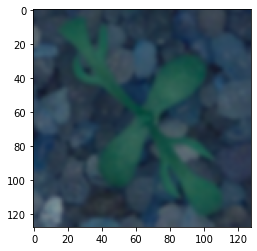

In [83]:
img6 = X_test[613]
check_2 = pd.Series.to_frame(y_test.iloc[613])

print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[613])] )
plt.imshow(img6)
print("Predited label is :", y_pred_class3[613])
print("Actual label is :", y_test_class[613])

In [84]:
y_test.iloc[555]

Label_Black-grass                  0
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   1
Name: 3316, dtype: uint8

Plant is :  3316    1
Name: Label_Sugar beet, dtype: uint8
Predited label is : 11
Actual label is : 11


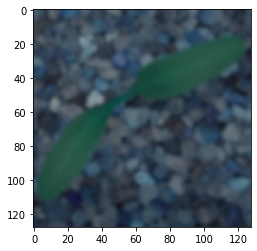

In [85]:
img7 = X_test[555]
check_2 = pd.Series.to_frame(y_test.iloc[555])

print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[555])] )
plt.imshow(img7)
print("Predited label is :", y_pred_class3[555])
print("Actual label is :", y_test_class[555])

In [86]:
y_test.iloc[333]

Label_Black-grass                  0
Label_Charlock                     1
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 2195, dtype: uint8

Plant is :  2195    1
Name: Label_Charlock, dtype: uint8
Predited label is : 9
Actual label is : 1


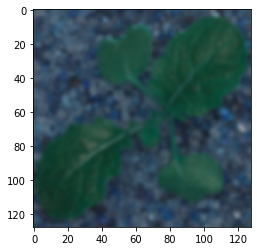

In [87]:
img8 = X_test[333]
check_2 = pd.Series.to_frame(y_test.iloc[333])

print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[333])] )
plt.imshow(img8)
print("Predited label is :", y_pred_class3[333])
print("Actual label is :", y_test_class[333])

In [88]:
y_test.iloc[111]

Label_Black-grass                  0
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   1
Name: 3421, dtype: uint8

Plant is :  3421    1
Name: Label_Sugar beet, dtype: uint8
Predited label is : 11
Actual label is : 11


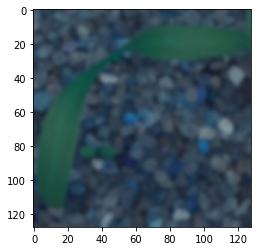

In [89]:
img9 = X_test[111]
check_2 = pd.Series.to_frame(y_test.iloc[111])

print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[111])] )
plt.imshow(img9)
print("Predited label is :", y_pred_class3[111])
print("Actual label is :", y_test_class[111])

In [90]:
y_test.iloc[222]

Label_Black-grass                  1
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    0
Label_Sugar beet                   0
Name: 3872, dtype: uint8

Plant is :  3872    1
Name: Label_Black-grass, dtype: uint8
Predited label is : 0
Actual label is : 0


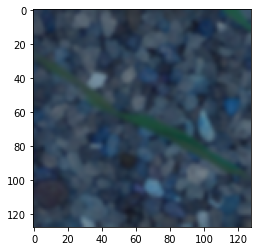

In [91]:
img10 = X_test[222]
check_2 = pd.Series.to_frame(y_test.iloc[222])

print('Plant is : ', check_2.iloc[np.argmax(y_test.iloc[222])] )
plt.imshow(img10)
print("Predited label is :", y_pred_class3[222])
print("Actual label is :", y_test_class[222])